1. Мини-EDA анализа данных
Загрузим файлы data/clients.csv и data/bank_transactions.csv и соберём базовую статистику: количество записей, уникальных значений, распределение категорий, максимальное повторение и соотношение типов транзакций.

Описание:

Загружаем файлы и выводим количество строк, уникальных значений, типы данных и первые строки.
Анализируем распределение transaction_type (включая p2p и withdrawal).
Проверяем максимальное повторение по ключевым полям (client_id, merchant, ip_network), чтобы понять, какие связи доминируют.

In [13]:
import pandas as pd

# Загружаем данные
clients = pd.read_csv('data/clients.csv')
transactions = pd.read_csv('data/bank_transactions.csv')

# Базовая статистика по clients
print("=== Статистика по clients.csv ===")
print(f"Количество строк: {len(clients)}")
print(f"Количество уникальных клиентов (client_id): {clients['client_id'].nunique()}")
print("\nСтолбцы и их типы:")
print(clients.dtypes)
print("\nПервые 5 строк:")
display(clients.head())
print("\nУникальные значения по столбцам:")
for column in clients.columns:
    print(f"{column}: {clients[column].nunique()} уникальных значений")

# Базовая статистика по transactions
print("\n=== Статистика по bank_transactions.csv ===")
print(f"Количество строк: {len(transactions)}")
print(f"Количество уникальных транзакций (transaction_id): {transactions['transaction_id'].nunique()}")
print("\nСтолбцы и их типы:")
print(transactions.dtypes)
print("\nПервые 5 строк:")
display(transactions.head())
print("\nУникальные значения по столбцам:")
for column in transactions.columns:
    print(f"{column}: {transactions[column].nunique()} уникальных значений")

# Распределение типов транзакций
print("\n=== Распределение типов транзакций ===")
transaction_type_counts = transactions['transaction_type'].value_counts()
print(transaction_type_counts)
print(f"Доля P2P: {transaction_type_counts.get('p2p', 0) / len(transactions) * 100:.2f}%")
print(f"Доля withdrawal: {transaction_type_counts.get('withdrawal', 0) / len(transactions) * 100:.2f}%")
print(f"Доля deposit: {transaction_type_counts.get('deposit', 0) / len(transactions) * 100:.2f}%")

# Максимальное повторение по ключевым полям
print("\n=== Максимальное повторение ===")
print(f"Максимальное повторение client_id: {transactions['client_id'].value_counts().max()}")
print(f"Максимальное повторение merchant: {transactions['merchant'].value_counts().dropna().max()}")
print(f"Максимальное повторение ip_address: {transactions['ip_address'].value_counts().dropna().max()}")

=== Статистика по clients.csv ===
Количество строк: 1200
Количество уникальных клиентов (client_id): 1200

Столбцы и их типы:
client_id                object
first_name               object
last_name                object
email                    object
passport_id              object
registration_date        object
status                   object
age                       int64
gender                   object
income_level             object
last_active_date         object
transaction_frequency    object
dtype: object

Первые 5 строк:


,client_id,first_name,last_name,email,passport_id,registration_date,status,age,gender,income_level,last_active_date,transaction_frequency
0,client_1,Michael,Johnson,client1@ex.com,AB000001123,2024-08-15,active,28,male,medium,2025-04-10,medium
1,client_2,Sofia,Garcia,client2@ex.com,AB000002123,2023-03-22,active,24,female,low,2025-03-28,high
2,client_3,Alexander,Petrov,client3@ex.com,AB000003123,2024-02-10,active,35,male,medium,2025-04-18,medium
3,client_4,Emma,Williams,client4@ex.com,AB000004123,2023-07-05,active,22,female,low,2025-03-15,medium
4,client_5,Wei,Zhang,client5@ex.com,AB000005123,2024-01-18,active,42,male,high,2025-04-01,high



Уникальные значения по столбцам:
client_id: 1200 уникальных значений
first_name: 146 уникальных значений
last_name: 307 уникальных значений
email: 1200 уникальных значений
passport_id: 1200 уникальных значений
registration_date: 247 уникальных значений
status: 2 уникальных значений
age: 24 уникальных значений
gender: 2 уникальных значений
income_level: 3 уникальных значений
last_active_date: 29 уникальных значений
transaction_frequency: 3 уникальных значений

=== Статистика по bank_transactions.csv ===
Количество строк: 4652
Количество уникальных транзакций (transaction_id): 4652

Столбцы и их типы:
id                       int64
transaction_id          object
client_id               object
datetime                object
amount                 float64
currency                object
merchant                object
transaction_type        object
ip_address              object
category                object
country_code            object
region                  object
device_type         

,id,transaction_id,client_id,datetime,amount,currency,merchant,transaction_type,ip_address,category,country_code,region,device_type,session_id,channel,recipient_id,transaction_purpose
0,1,0ece3492-67f2-43cb-886e-5f99360439fa,client_5,2025-04-12 15:32:17,125000.45,CNY,NaN,p2p,118.178.92.154,p2p,CN,Shanghai,smartphone,987e6543-e21b-12d3-a789-426614174000,mobile_app,client_27,debt
1,2,eaef9e16-5429-44aa-bb06-f0f2834ded3a,client_14,2025-04-19 18:45:23,85670.89,EUR,NaN,p2p,89.157.231.45,p2p,FR,Paris,smartphone,987e6543-e21b-12d3-a789-426614174001,mobile_app,client_33,debt
2,3,ff9ae270-0906-420a-9a3c-ec4856e1cc2f,client_27,2025-03-08 10:15:42,98500.32,USD,NaN,p2p,72.14.192.178,p2p,US,New York,smartphone,987e6543-e21b-12d3-a789-426614174002,mobile_app,client_5,debt
3,4,51854b88-558d-40fd-9b60-6e4c101c9964,client_33,2025-04-26 14:22:36,75800.75,USD,NaN,p2p,72.14.192.45,p2p,US,Los Angeles,tablet,987e6543-e21b-12d3-a789-426614174003,mobile_app,client_14,debt
4,5,9390ebae-7d5a-4216-ad68-c7b676852e5d,client_41,2025-03-15 16:37:51,215000.23,USD,NaN,p2p,72.14.192.89,p2p,US,Chicago,smartphone,987e6543-e21b-12d3-a789-426614174004,mobile_app,client_59,debt



Уникальные значения по столбцам:
id: 4652 уникальных значений
transaction_id: 4652 уникальных значений
client_id: 1139 уникальных значений
datetime: 2501 уникальных значений
amount: 2023 уникальных значений
currency: 4 уникальных значений
merchant: 13 уникальных значений
transaction_type: 3 уникальных значений
ip_address: 1066 уникальных значений
category: 6 уникальных значений
country_code: 5 уникальных значений
region: 11 уникальных значений
device_type: 3 уникальных значений
session_id: 2893 уникальных значений
channel: 3 уникальных значений
recipient_id: 862 уникальных значений
transaction_purpose: 3 уникальных значений

=== Распределение типов транзакций ===
transaction_type
p2p           1774
deposit       1698
withdrawal    1180
Name: count, dtype: int64
Доля P2P: 38.13%
Доля withdrawal: 25.37%
Доля deposit: 36.50%

=== Максимальное повторение ===
Максимальное повторение client_id: 79
Максимальное повторение merchant: 290
Максимальное повторение ip_address: 110


Ячейка 2: Подробный анализ связей
Проверим, как часто клиенты пересекаются по различным полям, чтобы понять потенциальные рёбра.

Описание:

Проверяем распределение клиентов по мерчантам, чтобы выявить крупных игроков.
Анализируем P2P и withdrawal, включая уникальные recipient_id_hash и client_id.
Проверяем, насколько session_id может генерировать рёбра.


In [14]:
# Анализ пересечений по мерчантам
merchant_pairs = transactions[transactions['merchant'].notna()].groupby('merchant')['client_id'].nunique().reset_index(name='client_count')
print("\n=== Количество клиентов по мерчантам ===")
print(merchant_pairs.sort_values('client_count', ascending=False).head(10))

# Анализ P2P и withdrawal
p2p_data = transactions[transactions['transaction_type'] == 'p2p']
withdrawal_data = transactions[transactions['transaction_type'] == 'withdrawal']
print(f"\nКоличество P2P-транзакций: {len(p2p_data)}")
print(f"Количество withdrawal-транзакций: {len(withdrawal_data)}")
print(f"Уникальных recipient_id в P2P: {p2p_data['recipient_id'].nunique()}")
print(f"Уникальных client_id в withdrawal: {withdrawal_data['client_id'].nunique()}")

# Анализ session_id
session_counts = transactions.groupby('session_id')['client_id'].nunique().reset_index(name='client_count')
session_multiple = session_counts[session_counts['client_count'] > 1]
print(f"\nКоличество session_id, используемых несколькими клиентами: {len(session_multiple)}")
print("Топ-5 session_id по количеству клиентов:")
print(session_multiple.sort_values('client_count', ascending=False).head())

# Анализ регионов и стран
print(f"\nУникальных регионов: {transactions['region'].nunique()}")
print(f"Уникальных стран: {transactions['country_code'].nunique()}")


=== Количество клиентов по мерчантам ===
       merchant  client_count
2        Amazon           154
9       Walmart           153
1        Alipay           140
8          Uber           136
12      Zalando           134
4     Carrefour           129
5          Ozon           128
6          Sber            99
10   WeChat Pay            78
11  Wildberries            70

Количество P2P-транзакций: 1774
Количество withdrawal-транзакций: 1180
Уникальных recipient_id в P2P: 862
Уникальных client_id в withdrawal: 412

Количество session_id, используемых несколькими клиентами: 146
Топ-5 session_id по количеству клиентов:
                                session_id  client_count
2771  e8f9a0b1-c2d3-e4f5-a6b7-c8d9e0f1a2b3            36
2760  e4f5a6b7-c8d9-e0f1-a2b3-c4d5e6f7a8b9            35
2656  a0b1c2d3-e4f5-a6b7-c8d9-e0f1a2b3c4d5            35
2718  c6d7e8f9-a0b1-c2d3-e4f5-a6b7c8d9e0f1            35
2712  c2d3e4f5-a6b7-c8d9-e0f1-a2b3c4d5e6f7            35

Уникальных регионов: 11
Уникальных

Описание:

Строим граф с нуля на основе bank_transactions.csv.
Добавляем рёбра по мерчантам (с фильтром до 100 клиентов), P2P и session_id.
Используем Label Propagation для кластеризации.

In [15]:
import networkx as nx
import pandas as pd
from datetime import timedelta

# Загружаем данные
transactions = pd.read_csv('data/bank_transactions.csv')
transactions['datetime'] = pd.to_datetime(transactions['datetime'])

# Создаём граф
G = nx.Graph()

# Добавляем узлы
clients_set = set(transactions['client_id'])
for client in clients_set:
    G.add_node(client)

# Создаём рёбра
edges = []

# Рёбра по общим мерчантам (только соседние по времени в пределах 1 дня)
merchant_groups = transactions[transactions['merchant'].notna()].sort_values('datetime')
for merchant, group in merchant_groups.groupby('merchant'):
    if len(group) <= 100:  # Фильтр по количеству клиентов
        for i in range(len(group) - 1):
            curr_client = group.iloc[i]['client_id']
            next_client = group.iloc[i + 1]['client_id']
            curr_time = group.iloc[i]['datetime']
            next_time = group.iloc[i + 1]['datetime']
            if next_time - curr_time <= timedelta(days=1) and curr_client != next_client:
                edges.append((curr_client, next_client, {'weight': 1.0, 'relationship': 'merchant_shared'}))

# Рёбра по P2P
p2p_edges = transactions[transactions['transaction_type'] == 'p2p']
for _, row in p2p_edges.iterrows():
    if pd.notna(row['recipient_id']) and row['client_id'] < row['recipient_id']:
        edges.append((row['client_id'], row['recipient_id'], {'weight': 10.0, 'relationship': 'p2p'}))

# Рёбра по session_id (только если более 5 клиентов)
session_groups = transactions.groupby('session_id')['client_id'].apply(list).reset_index(name='clients')
for _, row in session_groups.iterrows():
    clients_list = row['clients']
    if len(clients_list) > 5:
        for i in range(len(clients_list)):
            for j in range(i + 1, len(clients_list)):
                edges.append((clients_list[i], clients_list[j], {'weight': 0.5, 'relationship': 'session_shared'}))

# Рёбра по withdrawal (клиенты в одном регионе и дате)
withdrawal_groups = transactions[transactions['transaction_type'] == 'withdrawal'].groupby(['region', 'datetime'])['client_id'].apply(list).reset_index(name='clients')
for _, row in withdrawal_groups.iterrows():
    clients_list = row['clients']
    if len(clients_list) > 1:
        for i in range(len(clients_list)):
            for j in range(i + 1, len(clients_list)):
                edges.append((clients_list[i], clients_list[j], {'weight': 2.0, 'relationship': 'withdrawal_shared'}))

# Добавляем рёбра в граф
G.add_edges_from(edges)

print(f"Создан граф с {G.number_of_nodes()} узлами и {G.number_of_edges()} рёбрами")

# Кластеризация с Label Propagation
from networkx.algorithms.community import label_propagation_communities
communities = list(label_propagation_communities(G))
print(f"Найдено {len(communities)} сообществ")

# Статистика
community_sizes = [len(c) for c in communities]
community_sizes.sort(reverse=True)
print(f"Топ-5 размеров сообществ: {community_sizes[:5]}")
print(f"Доля крупнейшего сообщества: {community_sizes[0] / sum(community_sizes) * 100:.2f}%")

# Установка и использование Louvain
try:
    import community as community_louvain
    partition = community_louvain.best_partition(G)
    community_sizes_louvain = {comm: list(partition.values()).count(comm) for comm in set(partition.values())}
    community_sizes_louvain = dict(sorted(community_sizes_louvain.items(), key=lambda x: x[1], reverse=True))
    print(f"\nТоп-5 размеров сообществ (Louvain): {list(community_sizes_louvain.values())[:5]}")
    print(f"Доля крупнейшего сообщества (Louvain): {list(community_sizes_louvain.values())[0] / sum(community_sizes_louvain.values()) * 100:.2f}%")
except ImportError:
    print("Библиотека community не установлена. Установите её с помощью 'pip install python-louvain'.")

Создан граф с 1150 узлами и 1776 рёбрами
Найдено 574 сообществ
Топ-5 размеров сообществ: [65, 35, 16, 12, 10]
Доля крупнейшего сообщества: 5.65%

Топ-5 размеров сообществ (Louvain): [89, 54, 43, 17, 16]
Доля крупнейшего сообщества (Louvain): 7.74%


|                     |             0 |
|:--------------------|--------------:|
| nodes               | 1150          |
| edges               | 1776          |
| density             |    0.00268816 |
| avg_weighted_degree |    3.09       |
| avg_clustering      |    0.00599475 |
| diameter_LCC        |   18          |
| modularity_louvain  |    0.935408   |
| modularity_lp       |    0.827138   |


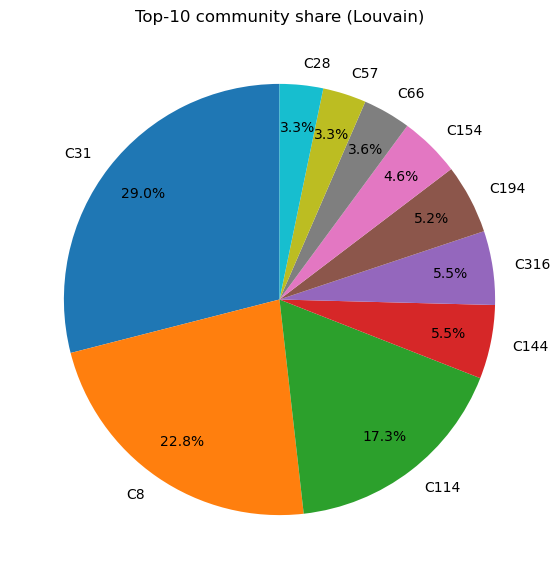

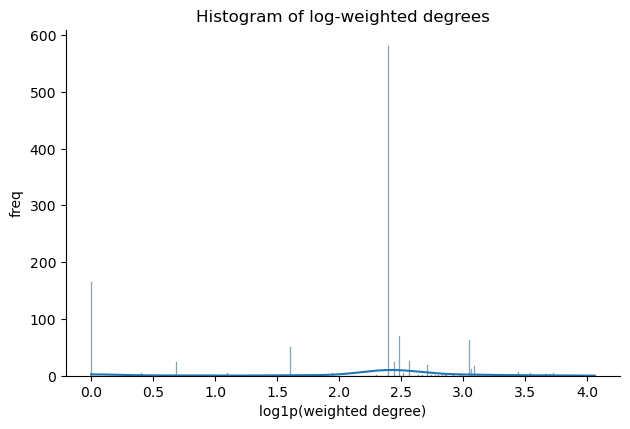

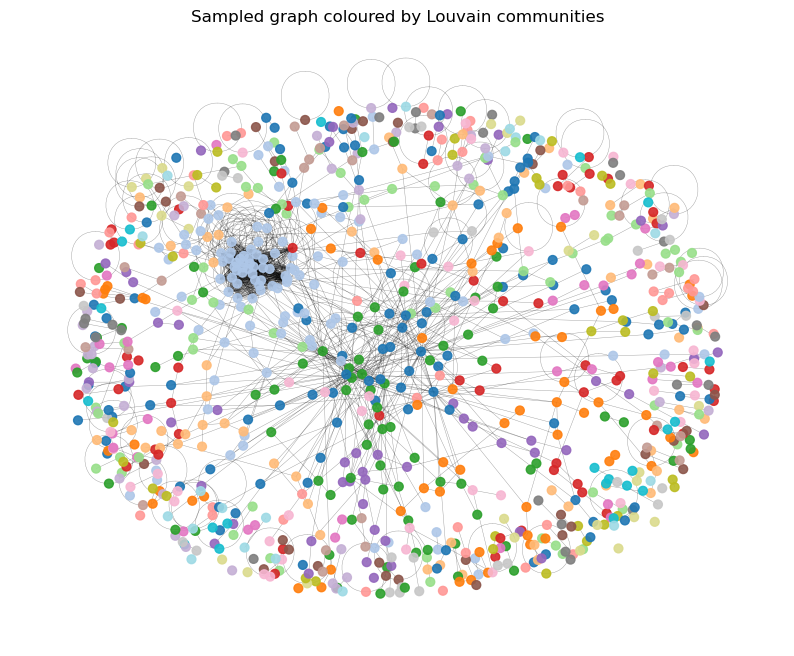

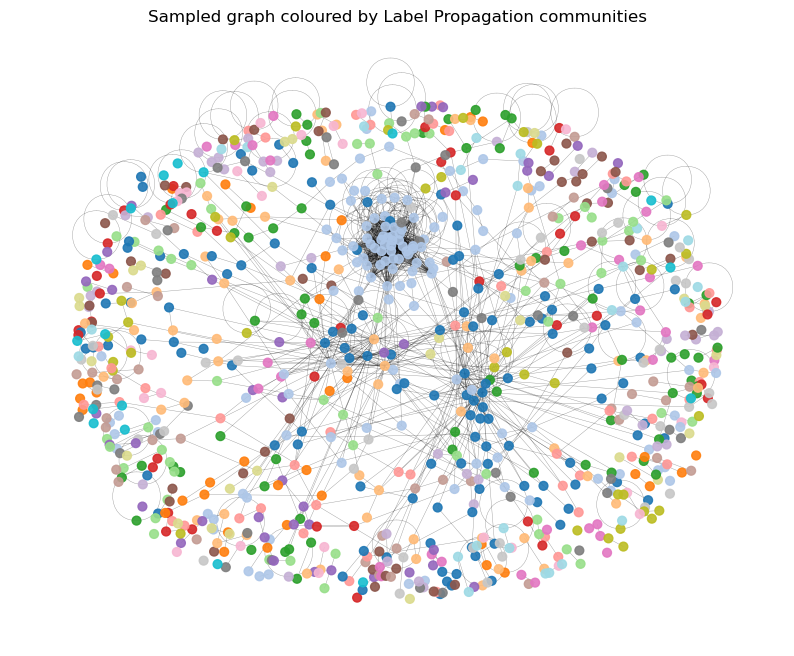

In [16]:
# VISUAL_ANALYTICS.PY
# -------------------
import networkx as nx, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from networkx.algorithms.community import label_propagation_communities
from pylab import rcParams
from community import modularity         # из python-louvain
import random, warnings; warnings.filterwarnings("ignore")

# ---- 1. сообщества Louvain (уже считаны ранее) --------------
louvain = nx.get_node_attributes(G, 'louvain_comm')      # из прошлого скрипта

# если не считано – считаем
if not louvain:
    import community as community_louvain
    louvain = community_louvain.best_partition(G, weight='weight')
    nx.set_node_attributes(G, louvain, 'louvain_comm')

# ---- 2. Label Propagation -----------------------------------
if 'lp_comm' not in nx.get_node_attributes(G, 'lp_comm'):
    lp_raw = list(label_propagation_communities(G))
    lp_map = {}
    for i, comm in enumerate(lp_raw):
        for node in comm:
            lp_map[node] = i
    nx.set_node_attributes(G, lp_map, 'lp_comm')
else:
    lp_map = nx.get_node_attributes(G, 'lp_comm')

# ---- 3. Метрики графа ---------------------------------------
n  = G.number_of_nodes();  m = G.number_of_edges()
density      = nx.density(G)
avg_deg      = round(2*m/n, 2)
avg_clust    = nx.average_clustering(G, weight='weight')
largest_cc   = max(nx.connected_components(G), key=len)
diameter_lcc = nx.diameter(G.subgraph(largest_cc))
lou_mod      = modularity(louvain, G, weight='weight')
lp_mod       = modularity(lp_map, G, weight='weight')

metrics = pd.Series({
    'nodes'              : n,
    'edges'              : m,
    'density'            : density,
    'avg_weighted_degree': avg_deg,
    'avg_clustering'     : avg_clust,
    'diameter_LCC'       : diameter_lcc,
    'modularity_louvain' : lou_mod,
    'modularity_lp'      : lp_mod
})
print(metrics.to_markdown())

# ---- 4. Pie-chart размеров сообществ (Louvain) --------------
sizes = pd.Series(louvain).value_counts().sort_values(ascending=False)
top10 = sizes.head(10)
fig, ax = plt.subplots(figsize=(7,7))
ax.pie(top10, labels=[f'C{c}' for c in top10.index],
       autopct='%1.1f%%', pctdistance=0.8, startangle=90)
ax.set_title('Top-10 community share (Louvain)')
plt.show()

# ---- 5. Гистограмма лог-взвешенной степени ------------------
deg = pd.Series(dict(G.degree(weight='weight')))
sns.displot(np.log1p(deg), kde=True, height=4, aspect=1.6)
plt.title('Histogram of log-weighted degrees')
plt.xlabel('log1p(weighted degree)');  plt.ylabel('freq')
plt.show()

# ---- 6. Функция выборочной визуализации графа ---------------
def draw_subgraph(comm_attr, comm_name, k=700):
    # берём k случайных узлов + их соседей
    base_nodes = random.sample(list(G.nodes), min(k, len(G)))
    nbrs = set(base_nodes)
    for n in base_nodes:
        nbrs.update(G[n])
    SG = G.subgraph(nbrs).copy()

    # выбираем цвет по сообществу
    comms = nx.get_node_attributes(G, comm_attr)
    colors = [comms.get(v, -1) for v in SG.nodes()]
    cmap = plt.cm.get_cmap('tab20')

    pos = nx.spring_layout(SG, seed=42, k=0.2)
    rcParams['figure.figsize'] = 10,8
    plt.figure()
    nx.draw_networkx_nodes(SG, pos,
                           node_size=40,
                           node_color=colors,
                           cmap=cmap,
                           alpha=0.9)
    nx.draw_networkx_edges(SG, pos,
                           width=0.3,
                           alpha=0.4)
    plt.title(f"Sampled graph coloured by {comm_name} communities")
    plt.axis('off')
    plt.show()

draw_subgraph('louvain_comm', 'Louvain')
draw_subgraph('lp_comm',      'Label Propagation')
